In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/AirPassengers.csv',index_col = 'Month',parse_dates = True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [69]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [70]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


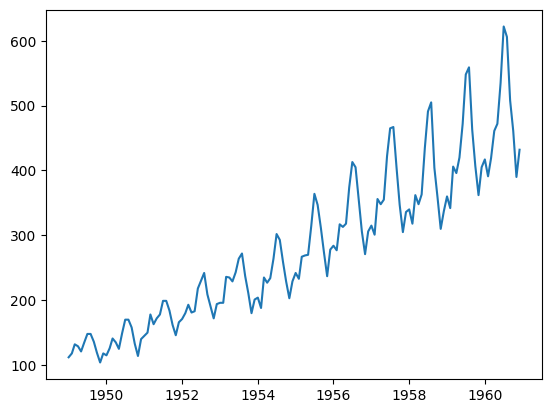

In [71]:
plt.plot(df)

In [72]:
df.isnull().sum()

,0
#Passengers,0


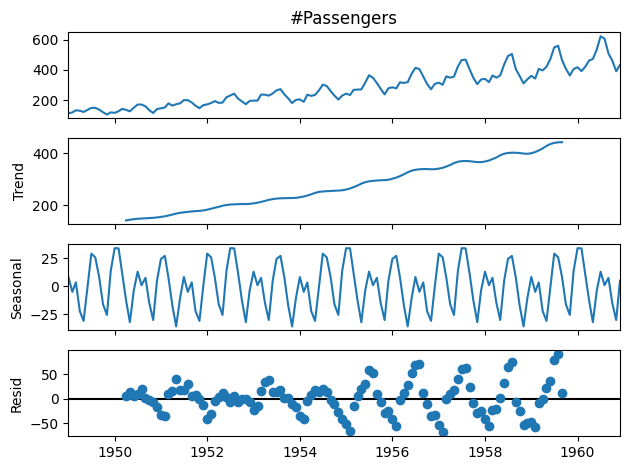

In [73]:
#decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['#Passengers'], model = 'additive',period = 30)

decompose.plot()
plt.show()

In [74]:
#Stationarity check

from statsmodels.tsa.stattools import adfuller,kpss

def adf_test(series):
    adf_ = adfuller(series)
    if adf_[1] < 0.05:
        return True
    return False

def kpss_test(series):
    kpss_ = kpss(series)
    if kpss_[1] > 0.05:
        return True
    return False



In [75]:
import warnings

warnings.filterwarnings('ignore')
print('adf_test:',adf_test(df))
print('kpss_test:',kpss_test(df))

adf_test: False
kpss_test: False


In [76]:
print('adf_test:',adf_test(df.diff().diff().dropna()))
print('kpss_test:',kpss_test(df.diff().diff().dropna()))

adf_test: True
kpss_test: True


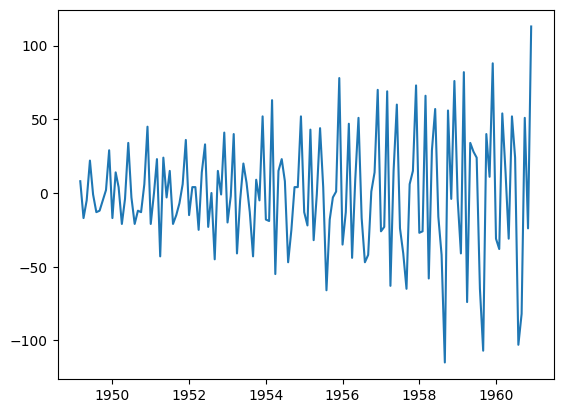

In [77]:
plt.plot(df.diff().diff().dropna())

In [78]:
df_diff = df.diff().dropna()

In [79]:
df_diff.head()

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


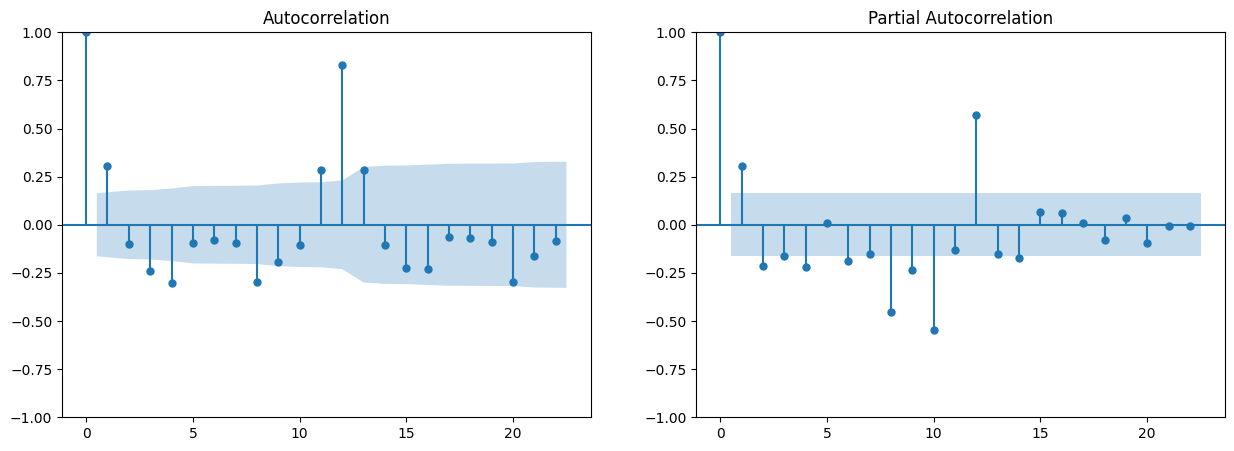

In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,axes = plt.subplots(1,2,figsize = (15,5))

plot_acf(df.diff().dropna(),ax = axes[0])
plot_pacf(df.diff().dropna(),ax = axes[1])
plt.show()

In [88]:
df_diff.head()

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


In [89]:
df_diff.tail()

,#Passengers
Month,
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0
1960-11-01,-71.0
1960-12-01,42.0


In [91]:
train = df_diff[:'1960-01-01']
test = df_diff['1960-01-01':]

In [101]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.1 MB/s eta 0:00:00


In [102]:
from pmdarima import auto_arima

auto_model = auto_arima(train,
                        seasonal = True,
                        m = 12,
                        trace = True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=4.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=914.490, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=909.252, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=910.190, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=912.700, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=908.515, Time=0.13 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=909.525, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=910.057, Time=0.20 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=909.748, Time=0.25 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=909.302, Time=0.14 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=911.748, Time=0.30 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=906.885, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12]             : AIC=907.606, Time=0.15 sec
 ARIMA(1,0,0)(0,1,1)[12]             : AI

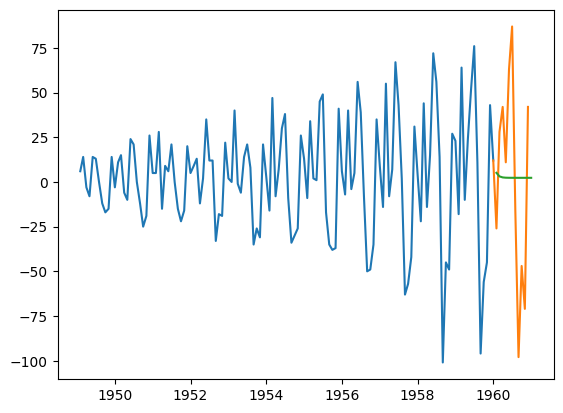

In [106]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(train,order = (1,0,0))

results = model.fit()

forecast_step = len(test)

forecast = results.get_forecast(steps = forecast_step)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.plot(train,label = 'train')
plt.plot(test,label = 'test')
plt.plot(mean_forecast,label = 'forecast')
plt.show()

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, mean_forecast)
rmse = np.sqrt(mean_squared_error(test, mean_forecast))

print("MAE:", mae)
print("RMSE:", rmse)
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")
print(f"Log Likelihood: {results.llf:.2f}")

MAE: 44.67109387578839
RMSE: 53.08950356316241
AIC: 1276.95
BIC: 1285.60
Log Likelihood: -635.47


In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,order = (1,0,0),seasonal_order = (0,1,0,12))

result = model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -451.442
Date:                            Wed, 18 Feb 2026   AIC                            906.885
Time:                                    06:02:35   BIC                            912.460
Sample:                                02-01-1949   HQIC                           909.149
                                     - 01-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2513      0.089     -2.822      0.005      -0.426      -0.077
sigma2       108.3772     13.168   

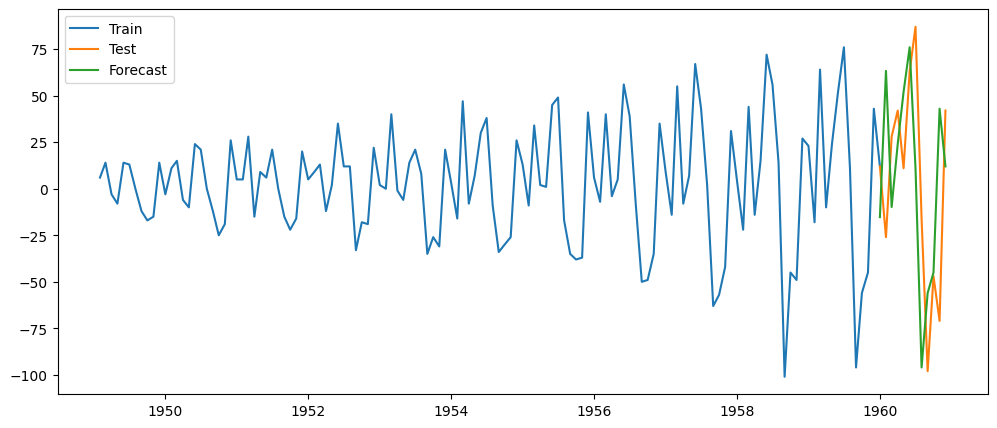

In [112]:
forecast = result.forecast(steps = len(test))

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [113]:
print("MAE:", mae)
print("RMSE:", rmse)
print(f"AIC: {result.aic:.2f}")
print(f"BIC: {result.bic:.2f}")
print(f"Log Likelihood: {result.llf:.2f}")

MAE: 44.67109387578839
RMSE: 53.08950356316241
AIC: 906.88
BIC: 912.46
Log Likelihood: -451.44


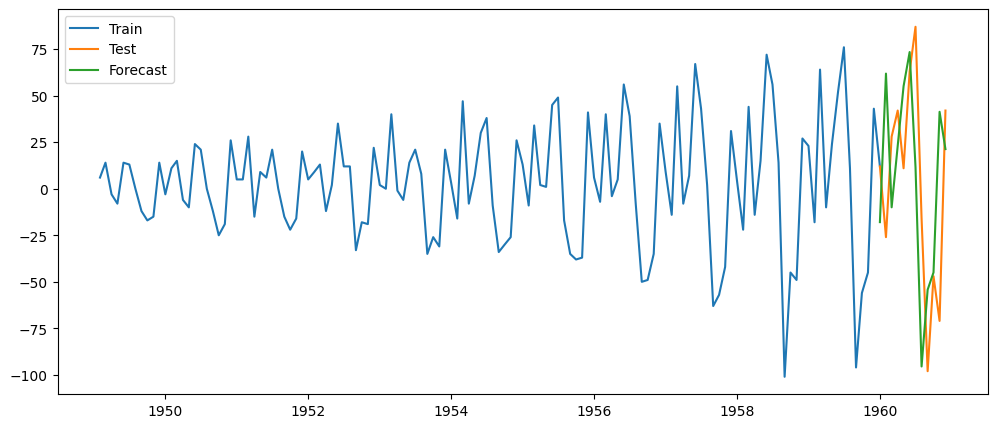

In [116]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(train,
                                trend = 'add',
                                seasonal = 'add',
                                seasonal_periods = 12)

results_es  = model_es.fit()
forecast_es = results_es.forecast(len(test))

plt.figure(figsize = (12,5))
plt.plot(train.index,train,label = 'Train')
plt.plot(test.index,test,label = 'Test')
plt.plot(test.index,forecast_es,label = 'Forecast')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('mae',mean_absolute_error(test,forecast_es))
print('rmse',np.sqrt(mean_squared_error(test,forecast_es)))
print('AIC',results_es.aic)
print('BIC',results_es.bic)

mae 46.91148467885594
rmse 57.32442696605752
AIC 643.8913823218184
BIC 690.0162130832002
